In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Sales.csv')
df.head()

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,0,2354,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,1,2361,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,2,2415,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,3,2427,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,4,2456,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [4]:
df.shape # Checking the shape of the dataframe

(5000, 41)

In [5]:
df.dtypes # Checking the types

index                          int64
CustomerID                     int64
TOTAL_ORDERS                   int64
REVENUE                      float64
AVERAGE_ORDER_VALUE          float64
CARRIAGE_REVENUE             float64
AVERAGESHIPPING              float64
FIRST_ORDER_DATE              object
LATEST_ORDER_DATE             object
AVGDAYSBETWEENORDERS         float64
DAYSSINCELASTORDER             int64
MONDAY_ORDERS                  int64
TUESDAY_ORDERS                 int64
WEDNESDAY_ORDERS               int64
THURSDAY_ORDERS                int64
FRIDAY_ORDERS                  int64
SATURDAY_ORDERS                int64
SUNDAY_ORDERS                  int64
MONDAY_REVENUE               float64
TUESDAY_REVENUE              float64
WEDNESDAY_REVENUE            float64
THURSDAY_REVENUE             float64
FRIDAY_REVENUE               float64
SATURDAY_REVENUE             float64
SUNDAY_REVENUE               float64
WEEK1_DAY01_DAY07_ORDERS       int64
WEEK2_DAY08_DAY15_ORDERS       int64
W

In [7]:
df.isna().sum() # Looking if there are any Null values

index                        0
CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DA

In [8]:
print(len(df['index'].unique()))
print(len(df['CustomerID'].unique()))
# Looks like all the customer ID's and indexes are unique and do 
#not overlap with each other at all so we cannot group by them

5000
5000


# First Impressions
## On looking at the data for the first time, we can see that the data has the parameters that correspond to : 
### Orders by customer for an eccomerce With the total number of orders made on the corresponding days
### Total revenue made on those days 
### Orders made during that week
### Revenue made during that week 
### Date when first item was ordered and the days since the last one
### How much revenue was made on the average order by the consumer
###  Shipping revenue and time

## There seems to be not a lot of categorical data to groupby , as all of it is numeric or with Dates


In [10]:
df.describe() # Describing the dataset to get the first look.

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,43041.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,1443.520003,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,0.000000,2333.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1249.750000,4019.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,2499.500000,16097.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,3749.250000,74223.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,4999.000000,279492.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


# Doing binning on the total orders by the customers by putting 0-8 to low 8-20 as medium and 20 and above as large order.

In [18]:
bins = [ 0, 8, 20, 156 ]
labels = ['small', 'medium', 'large']

In [19]:
df_copy = df.copy()


In [20]:
df_copy['bin_cut'] = pd.cut(df_copy['TOTAL_ORDERS'] , bins=bins, labels=labels, include_lowest=True)

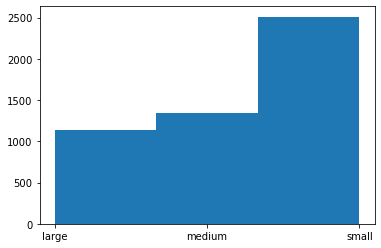

In [24]:
plt.hist(df_copy['bin_cut'], bins=3)
plt.show()

# number of small orders are seen to be the ones with the highest frequency from within the 5000 customers ( Total orders between 0-8)

In [38]:
df_changed = df.copy()
del df_changed["index"]
del df_changed["CustomerID"]

# Getting only numerical data columns
num = ['int64', 'float64']
num_col_names = df_changed.select_dtypes(include=num).columns
num_col_names

Index(['TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE',
       'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE'],
      dtype='object')

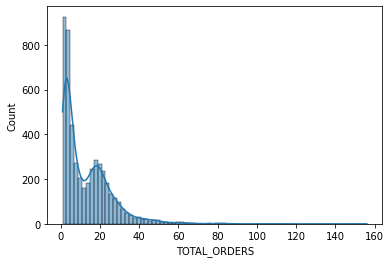

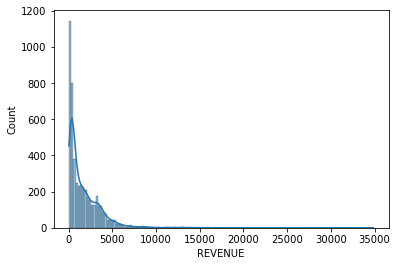

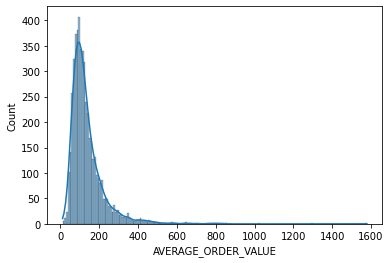

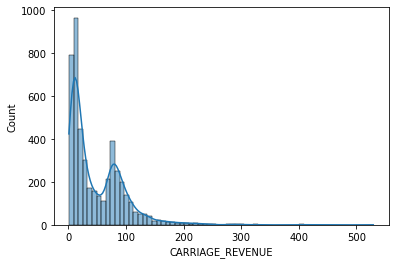

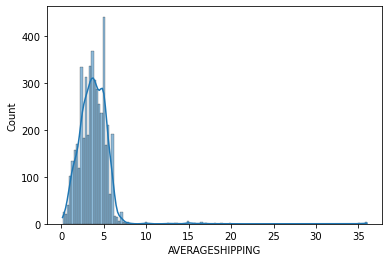

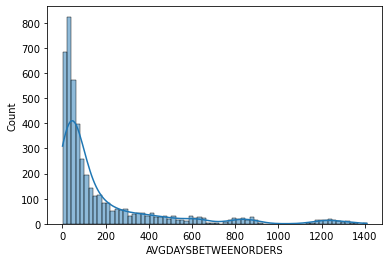

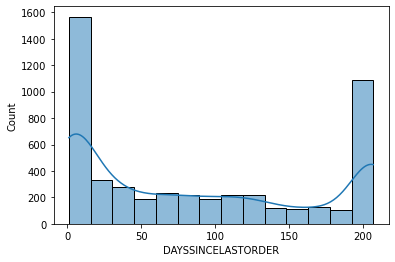

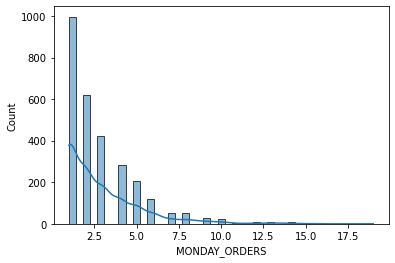

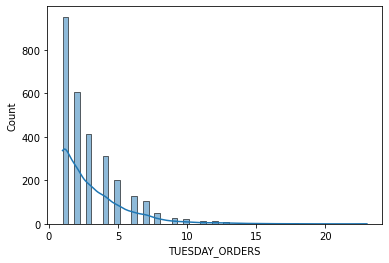

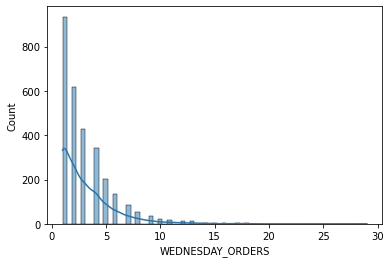

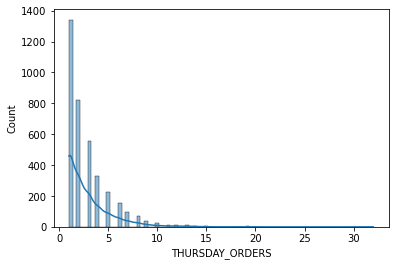

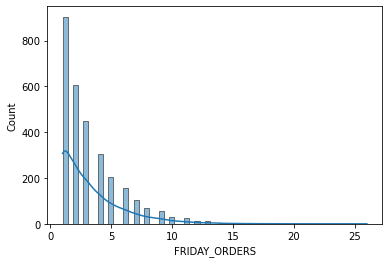

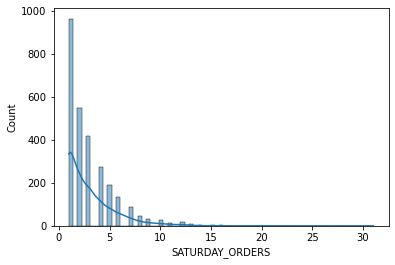

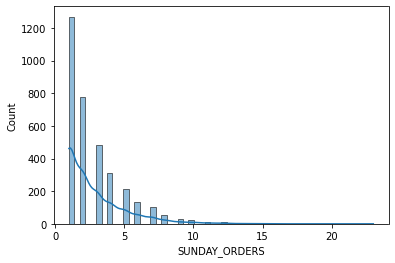

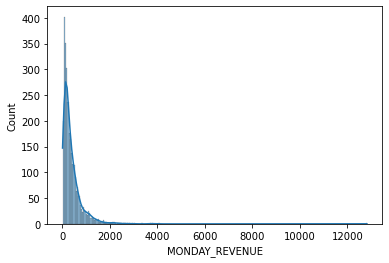

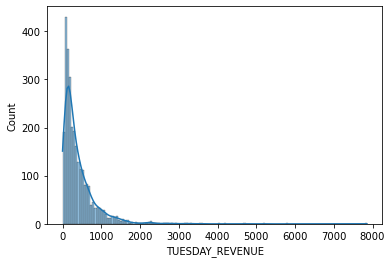

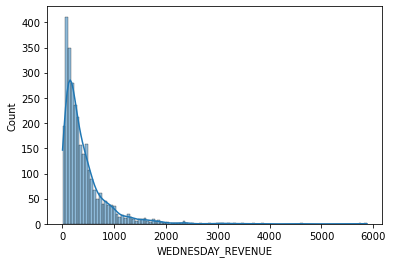

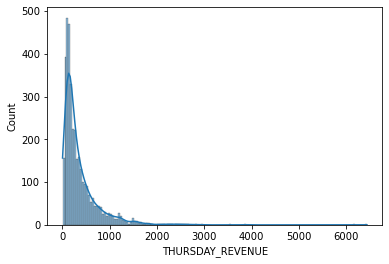

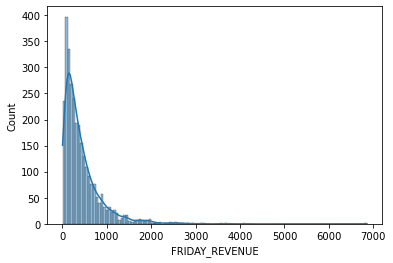

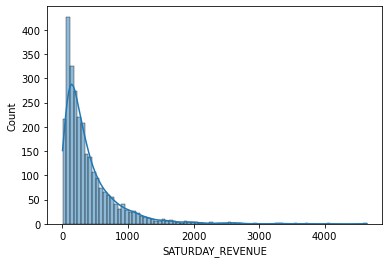

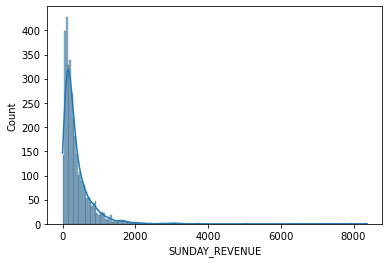

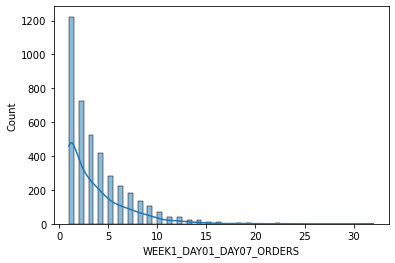

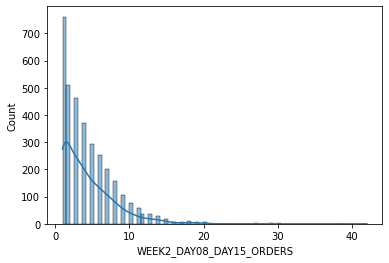

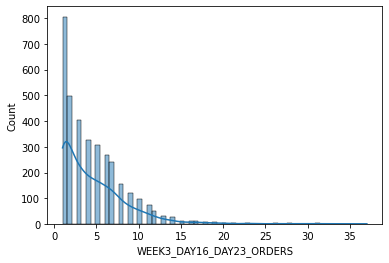

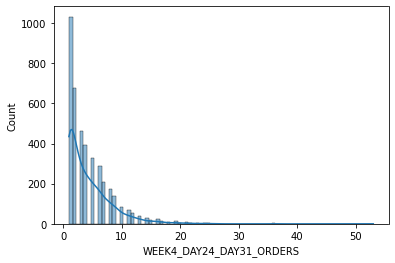

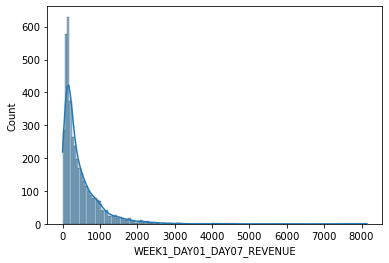

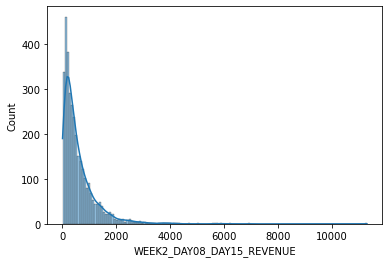

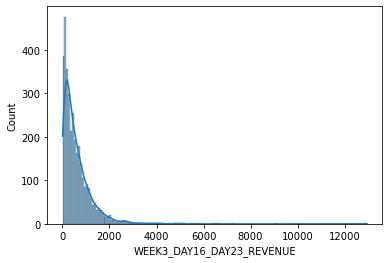

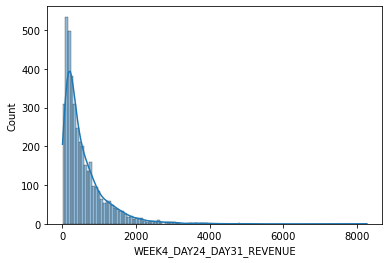

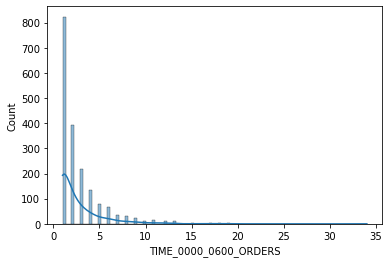

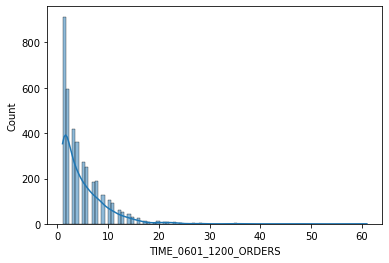

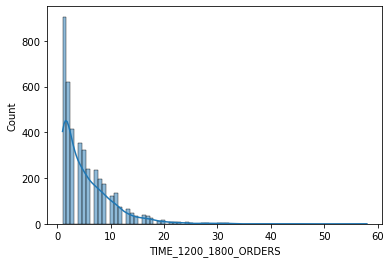

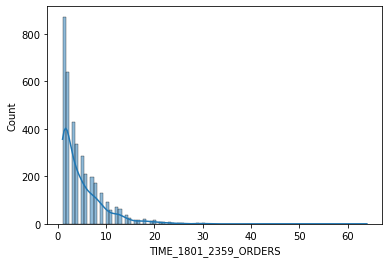

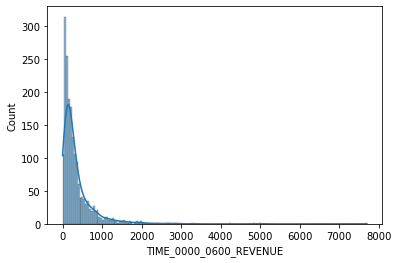

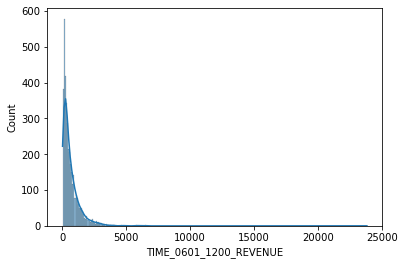

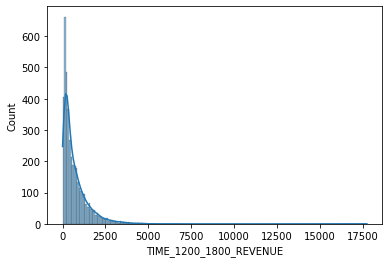

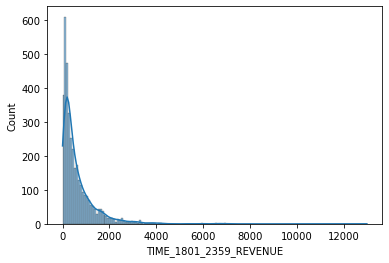

In [41]:
for column in num_col_names:
    ax = sns.histplot(data=df_changed[df_changed[column] > 0], x=column, kde=True)
    plt.show()

# As we are seeing the dataplots above for the distribution, we can see that the data is mostly skewed towards the left side with some outliers on the right side which may have caused a disturbance in the describe function as it skews with the mean of the values, but overall all the data seems to be pretty uniform in the behavior with a spike at the start and a decline after that

# Different behaiviour is seen in Days since last order( higher value at the end and start but less in the middle) Average shipping( Bell curved)

In [86]:

# Regular on the 25th Percentile 
# One time by 75th percentile of days since last ordered
def regular_or_not(x):
    if x['AVGDAYSBETWEENORDERS'] == 0:
        return 'OneTimeBuyer'
    elif x['AVGDAYSBETWEENORDERS'] <= 8:
        return 'Weekly'
    elif x['AVGDAYSBETWEENORDERS'] <= 32:
        return 'Monthly'
    elif x['AVGDAYSBETWEENORDERS'] <= 360:
        return 'Yearly'
    else:
        return 'OneTimeBuyer'

df_changed['type'] = df_changed.apply(regular_or_not, axis=1)

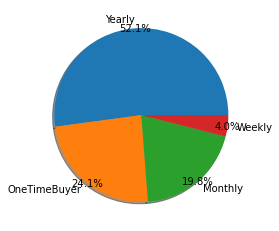

In [87]:
classes = df_changed['type'].value_counts()
ax = plt.pie(x=classes, autopct="%.1f%%", labels=classes.index, pctdistance=1,shadow=True )

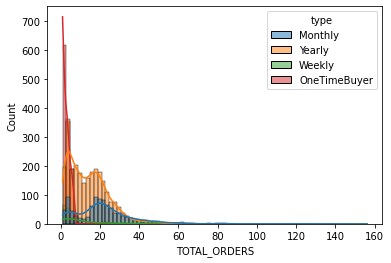

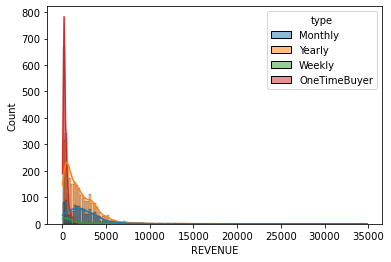

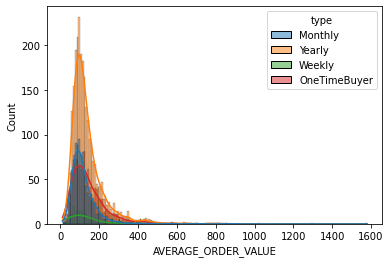

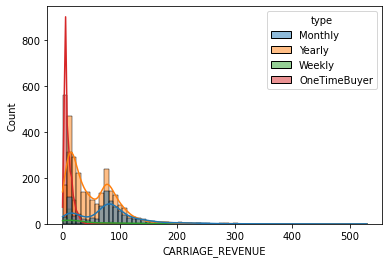

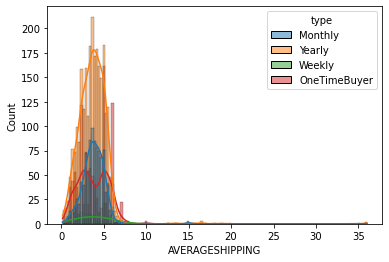

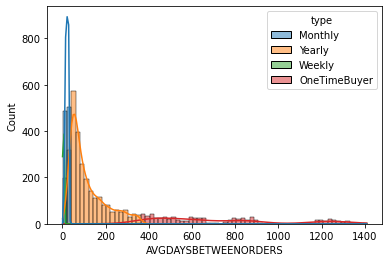

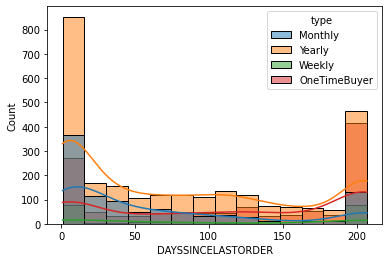

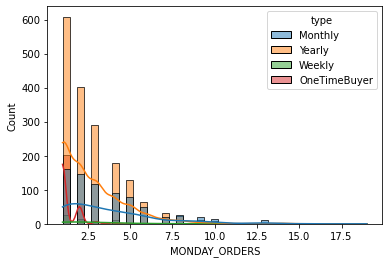

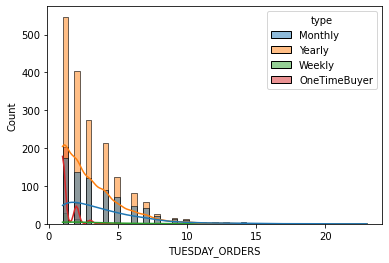

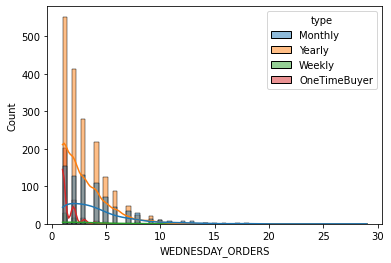

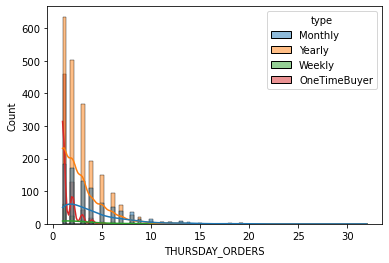

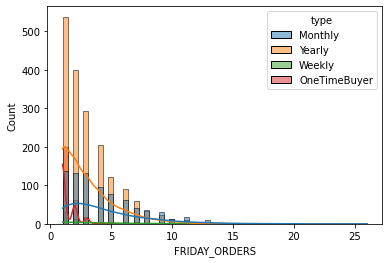

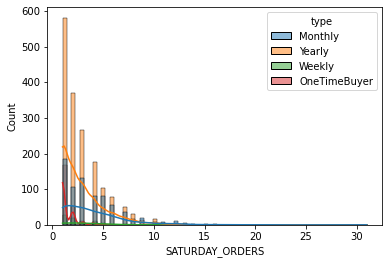

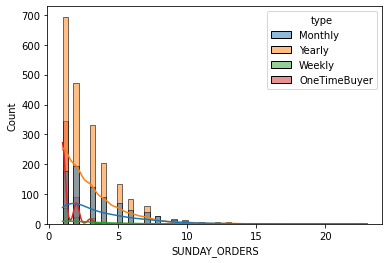

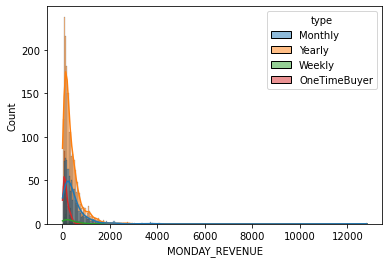

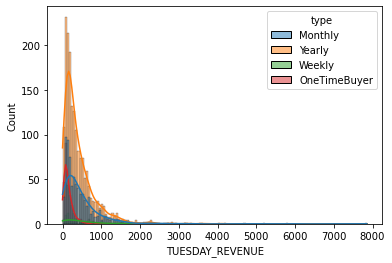

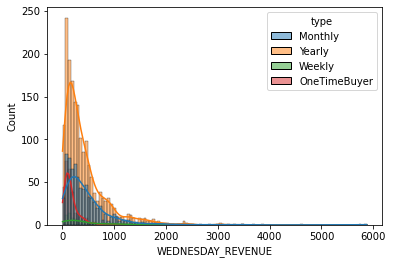

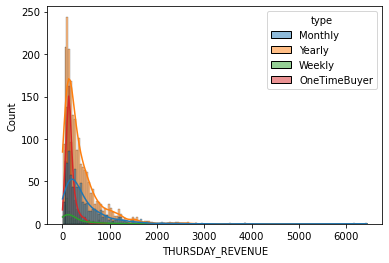

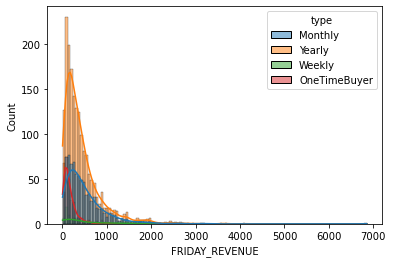

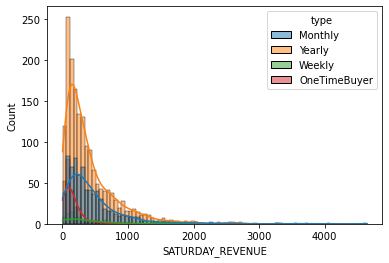

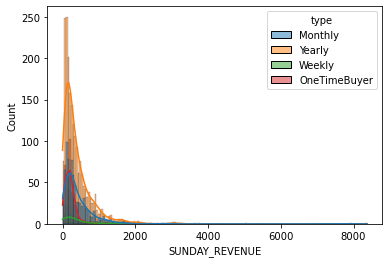

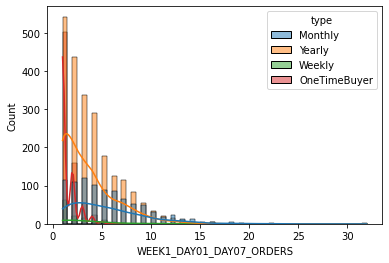

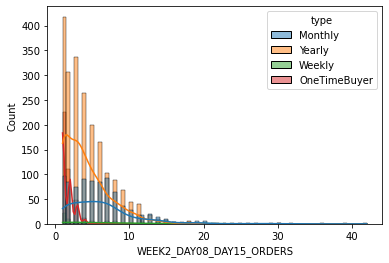

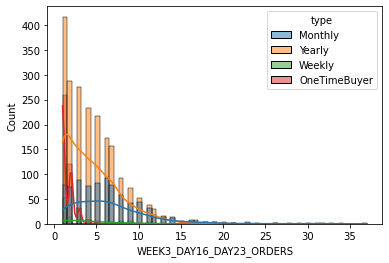

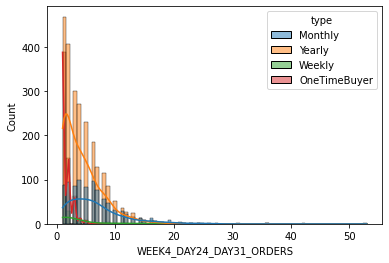

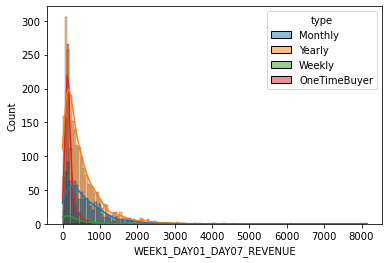

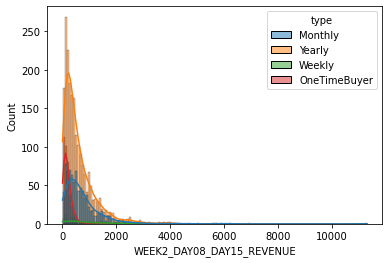

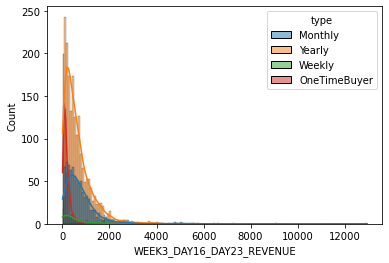

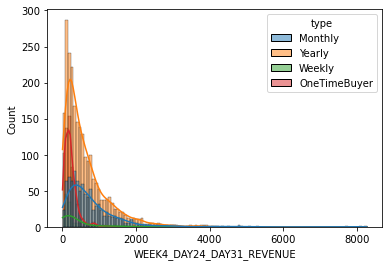

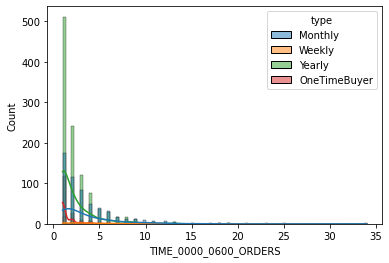

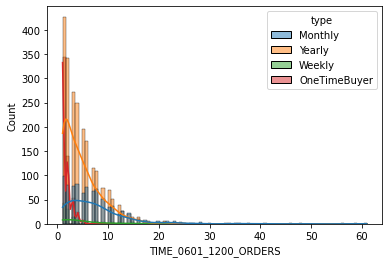

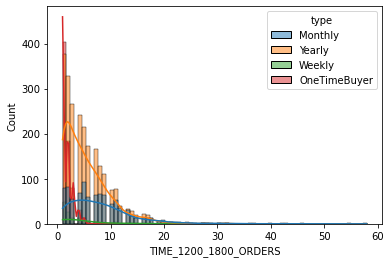

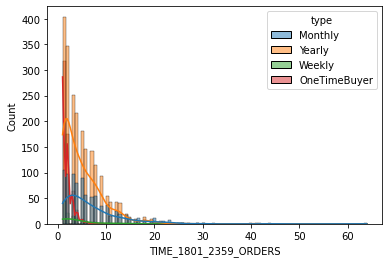

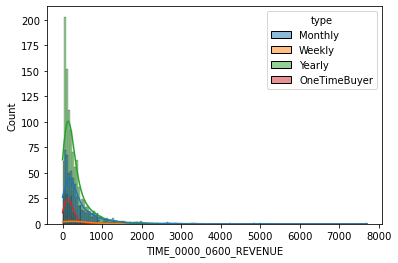

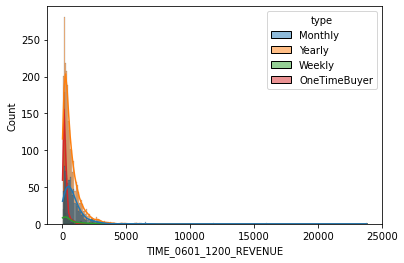

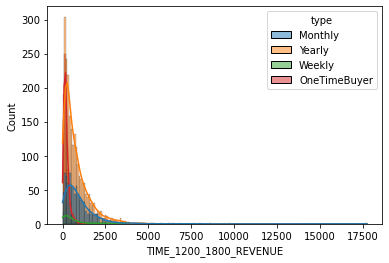

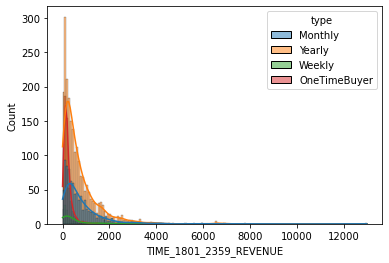

In [88]:
for column in num_col_names:
    df_filter = df_changed[df_changed['type'] != 'None']
    ax = sns.histplot(data=df_filter[df_filter[column] > 0], x=column, kde=True, hue='type')
    plt.show()

In [60]:
num_col_names.tolist()

['TOTAL_ORDERS',
 'REVENUE',
 'AVERAGE_ORDER_VALUE',
 'CARRIAGE_REVENUE',
 'AVERAGESHIPPING',
 'AVGDAYSBETWEENORDERS',
 'DAYSSINCELASTORDER',
 'MONDAY_ORDERS',
 'TUESDAY_ORDERS',
 'WEDNESDAY_ORDERS',
 'THURSDAY_ORDERS',
 'FRIDAY_ORDERS',
 'SATURDAY_ORDERS',
 'SUNDAY_ORDERS',
 'MONDAY_REVENUE',
 'TUESDAY_REVENUE',
 'WEDNESDAY_REVENUE',
 'THURSDAY_REVENUE',
 'FRIDAY_REVENUE',
 'SATURDAY_REVENUE',
 'SUNDAY_REVENUE',
 'WEEK1_DAY01_DAY07_ORDERS',
 'WEEK2_DAY08_DAY15_ORDERS',
 'WEEK3_DAY16_DAY23_ORDERS',
 'WEEK4_DAY24_DAY31_ORDERS',
 'WEEK1_DAY01_DAY07_REVENUE',
 'WEEK2_DAY08_DAY15_REVENUE',
 'WEEK3_DAY16_DAY23_REVENUE',
 'WEEK4_DAY24_DAY31_REVENUE',
 'TIME_0000_0600_ORDERS',
 'TIME_0601_1200_ORDERS',
 'TIME_1200_1800_ORDERS',
 'TIME_1801_2359_ORDERS',
 'TIME_0000_0600_REVENUE',
 'TIME_0601_1200_REVENUE',
 'TIME_1200_1800_REVENUE',
 'TIME_1801_2359_REVENUE']

# The above graphs show the distributions with the distinction that if the buyers are regualars monthly or  One time or irrregular buyers by seeing how Average number of days since they last ordered.

# TO DO, See by timing of the orders/ Weeks and days of the orders to see a pattern.

Text(0.5, 1.0, 'Number of orders by days')

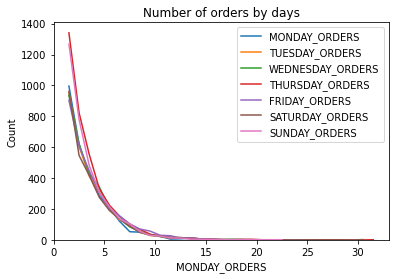

In [72]:
days_array = pd.Series(['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'])

Order_days = days_array + '_ORDERS'
fig, ax = plt.subplots()
for day_name in Order_days:
    df_filter = df_changed[day_name] > 0
    sns.histplot(data= df[df_filter], x=day_name, element='poly', fill= False, binwidth=1, label = day_name)
ax.legend(loc="upper right")
plt.title('Number of orders by days')

Text(0.5, 1.0, 'revenue earned by days')

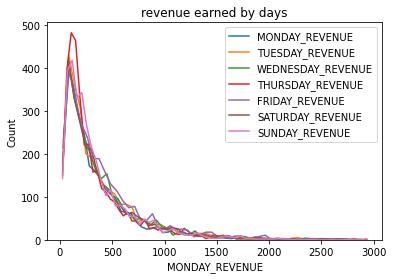

In [71]:
days_revenue = days_array + '_REVENUE'
fig, ax = plt.subplots()
for column in days_revenue:
    df_filter = (df_changed[column] < 3000) & (df_changed[column] > 0)
    sns.histplot(data= df[df_filter], x=column, element='poly', fill= False, label = column)
ax.legend(loc="upper right")
plt.title('revenue earned by days')

# Above graphs shows the revenue earned and orders given by the company by the day value and it looks like EVen though the trend is the same, Thursday dominates in both peaks

Text(0.5, 1.0, 'Number of orders by Timing')

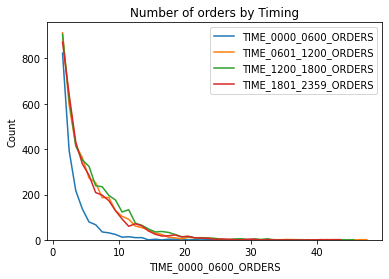

In [101]:
time_array = pd.Series(['TIME_0000_0600', 'TIME_0601_1200', 'TIME_1200_1800', 'TIME_1801_2359'])

Order_Time = time_array + '_ORDERS'
fig, ax = plt.subplots()
for time in Order_Time:
    df_filter = df_filter = (df[time] < 50) & (df[time] > 0)
    sns.histplot(data= df[df_filter], x=time, element='poly', fill= False, binwidth=1, label = time)
ax.legend(loc="upper right")
plt.title('Number of orders by Timing')

Text(0.5, 1.0, 'Revenue by Time')

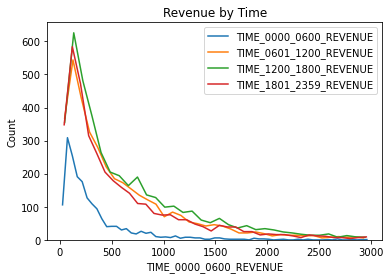

In [100]:
time_array = pd.Series(['TIME_0000_0600', 'TIME_0601_1200', 'TIME_1200_1800', 'TIME_1801_2359'])

Order_Time = time_array + '_REVENUE'
fig, ax = plt.subplots()
for time in Order_Time:
    df_filter = df_filter = (df[time] < 3000) & (df[time] > 0)
    sns.histplot(data= df[df_filter], x=time, element='poly', fill= False, label = time)
ax.legend(loc="upper right")
plt.title('Revenue by Time')

Text(0.5, 1.0, 'Revenue by Week')

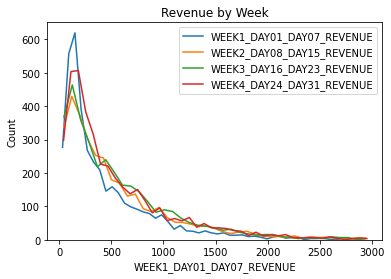

In [103]:
Week_Array = pd.Series(['WEEK1_DAY01_DAY07', 'WEEK2_DAY08_DAY15', 'WEEK3_DAY16_DAY23', 'WEEK4_DAY24_DAY31'])

Week_order = Week_Array + '_REVENUE'
fig, ax = plt.subplots()
for week in Week_order:
    df_filter = df_filter = (df[week] < 3000) & (df[week] > 0)
    sns.histplot(data= df[df_filter], x=week, element='poly', fill= False, label = week)
ax.legend(loc="upper right")
plt.title('Revenue by Week')

Text(0.5, 1.0, 'Orders by Week')

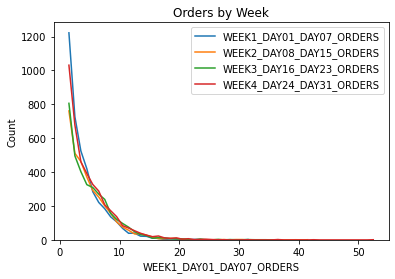

In [110]:
Week_Array = pd.Series(['WEEK1_DAY01_DAY07', 'WEEK2_DAY08_DAY15', 'WEEK3_DAY16_DAY23', 'WEEK4_DAY24_DAY31'])

Week_order = Week_Array + '_ORDERS'
fig, ax = plt.subplots()
for week in Week_order:
    df_filter = df_filter = df[week] > 0
    sns.histplot(data= df[df_filter], x=week, element='poly', fill= False,binwidth= 1, label = week)
ax.legend(loc="upper right")
plt.title('Orders by Week')